In [1]:
#Libraries and dependecies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor



from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import cross_val_predict



In [2]:
#Loading Data
googleTrend = pd.read_csv("multiTimeline.csv", sep=',', skiprows=[0])
df = pd.read_csv('data_wordle.csv', usecols=['Week', 'Number of  reported results'], sep=',')
googleTrend

,Week,wordle: (United States)
0,2022-01-09,14
1,2022-01-16,31
2,2022-01-23,50
3,2022-01-30,74
4,2022-02-06,87
5,2022-02-13,100
6,2022-02-20,97
7,2022-02-27,92
8,2022-03-06,86
9,2022-03-13,83


In [22]:
# Convert date column to datetime format
googleTrend['Week'] = pd.to_datetime(googleTrend['Week'])

# Extract month from date column
googleTrend['month_column'] = googleTrend['Week'].apply(lambda x: x.strftime('%m'))

googleTrend = googleTrend.drop(index = range(35))

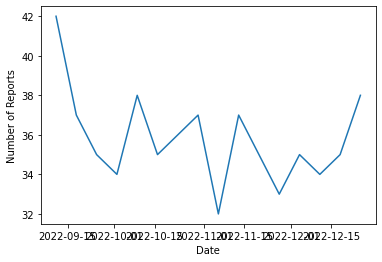

In [23]:
plt.plot(googleTrend['Week'], googleTrend['wordle: (United States)'])
plt.xlabel('Date')
plt.ylabel('Number of Reports')
plt.show()

In [5]:
# Convert the 'Week' column to a string
googleTrend['Week'] = pd.to_datetime(googleTrend['Week']).dt.date.astype(str)

# Set the 'Week' column as the index and convert to a dictionary
dict_list = googleTrend.set_index('Week')['wordle: (United States)'].to_dict()

# Print the dictionary
#(dict_list)
max_reported_results = df['Number of  reported results'].max()
max_row = df.loc[df['Number of  reported results'] == max_reported_results]
print("Row(s) with the maximum number of reported results:\n", max_row)


Row(s) with the maximum number of reported results:
           Week  Number of  reported results
24  2022-01-30                       361908


In [6]:
df = df.drop(index=range(35))
df

,Week,Number of reported results
35,2022-02-13,277471
36,2022-02-13,261521
37,2022-02-13,287836
38,2022-02-13,289721
39,2022-02-13,342003
...,...,...
352,2022-12-25,20879
353,2022-12-25,20160
354,2022-12-25,20001
355,2022-12-25,21204


           Week  Number of  reported results  Popularity  Time
35   2022-02-13                       277471         100     1
36   2022-02-13                       261521         100     2
37   2022-02-13                       287836         100     3
38   2022-02-13                       289721         100     4
39   2022-02-13                       342003         100     5
..          ...                          ...         ...   ...
352  2022-12-25                        20879          38   318
353  2022-12-25                        20160          38   319
354  2022-12-25                        20001          38   320
355  2022-12-25                        21204          38   321
356  2022-12-25                        20380          38   322

[322 rows x 4 columns]


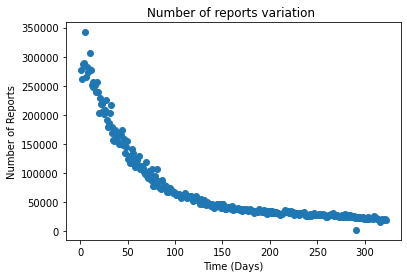

In [18]:
arr = []
time = []
i = 0
for index, row in df.iterrows():
    month = int(row['Week'].split('-')[1])
    i = i + 1
    time.append(i)
    if row['Week'] in dict_list:
        arr.append(dict_list[row['Week']])
df['Popularity'] = arr
df['Time'] = time
print(df)
#df

plt.scatter(df['Time'], df['Number of  reported results'])
plt.xlabel('Time (Days)')
plt.ylabel('Number of Reports')
plt.title('Number of reports variation ')
plt.show()

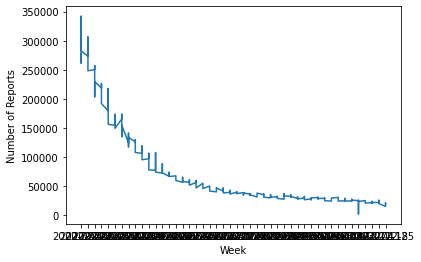

In [16]:
plt.plot(df['Week'], df['Number of  reported results'])
plt.xlabel('Week')
plt.ylabel('Number of Reports')
plt.show()

### __DATA EXPLORATION__

The initial step in the analysis was to verify the presence of missing or null values within the dataset. These missing values, if not addressed adequately, can have a negative impact on the performance or result in a biased model. After examination, it was determined that there were no missing values in the dataset.

In [46]:
#missing data

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 35 to 356
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Week                         322 non-null    object
 1   Number of  reported results  322 non-null    int64 
 2   Popularity                   322 non-null    int64 
 3   Time                         322 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 10.2+ KB


,Week,Number of reported results,Popularity,Time
35,2022-02-13,277471,100,1
36,2022-02-13,261521,100,2
37,2022-02-13,287836,100,3
38,2022-02-13,289721,100,4
39,2022-02-13,342003,100,5
...,...,...,...,...
352,2022-12-25,20879,38,318
353,2022-12-25,20160,38,319
354,2022-12-25,20001,38,320
355,2022-12-25,21204,38,321


Our table of statistics showed that the variables are spread widely. In machine learning, it is common for variables to have a wide range of values, as shown by the table of statistics. This wide spread can lead to inconsistencies and affect the predictions made by the model. To address this issue, various preprocessing techniques can be applied to transform the variables, such as normalization, scaling, or standardization, to ensure that all the variables are on the same scale and to prevent any one variable from having a disproportionate influence on the model. By transforming the variables, the performance and accuracy of the machine learning models can be improved. We will discuss our apporach in the latter sections.

In [47]:
#overall statistics

df.describe()


,Number of reported results,Popularity,Time
count,322.000000,322.000000,322.000000
mean,72163.813665,54.456522,161.500000
std,68613.218840,20.960718,93.097619
min,2569.000000,32.000000,1.000000
25%,29165.250000,37.000000,81.250000
50%,39231.000000,45.000000,161.500000
75%,84224.250000,72.000000,241.750000
max,342003.000000,100.000000,322.000000


Many statistical techniques, such as linear regressions and t-tests, assume normality in their underlying data distribution. To assess this assumption, histograms were utilized to visualize the distribution of the variables. The results showed that some variables had a skewed distribution.

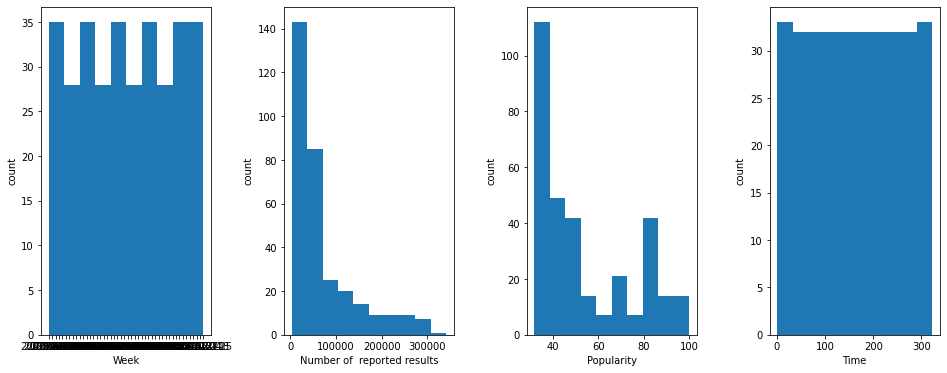

In [48]:
#Red Wine Normality Distribution
fig = plt.figure(figsize = [20,10])
cols = df.columns
count = 1
for col in cols:
    ax = plt.subplot(2,6,count)
    count+=1
    plt.hist(df[col])
    ax.set_xlabel(xlabel=col)
    ax.set_ylabel(ylabel="count")
plt.tight_layout()
plt.savefig('histogram_red.jpeg')

#do different scaling for each, if it's too skwed we can do log scaling


We then employed the use of boxplots to detect outliers. Outliers are defined as data points that deviate significantly from the main distribution of the data (Point 1). These deviations can either be a result of measurement errors or can reflect the true variation of the data. Outliers can significantly impact the summary statistics and make them unrepresentative of the main distribution of the data. Our analysis of the boxplots revealed the presence of outliers or skewness in all variables except alcohol.

In the process of data exploration (Point 5), it is important to assess the presence of high feature correlation within the data (Zuur, 2010). This is because, although high correlation may not necessarily degrade the prediction performance of the model, it can introduce collinearity and affect the estimated coefficients. This can lead to an unreliable interpretation of feature significance, as the coefficients may fluctuate significantly based on other correlated features. Our analysis through a heatmap revealed strong correlations among density, citric acid, and fixed acidity, as well as between free sulfur dioxide and total sulfur dioxide.

#Pretend you are writing a machine learning professional but don't know what to do 

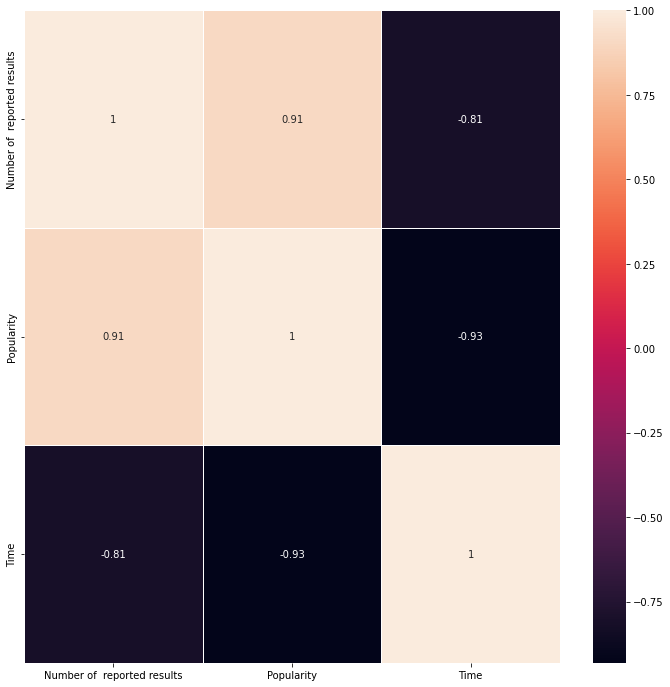

In [58]:
# Heatmap and Correlation 
#glue = sns.load_dataset(df).pivot("Model", "Task", "Score")
fig, ax = plt.subplots(figsize = (12,12))
df1 = pd.DataFrame(df, columns=cols)
sns.heatmap(df.corr(), annot=True, linewidths=0.5)
plt.savefig('heatmap_red.jpeg')


In [71]:
#getting inputs and target
x= df.values[:, 2]
#print(x)
y = df.values[:, 1]
#print(y)

-169386.55079176227
Coefficients: [ 1.12172497e+04 -2.11871657e+02  1.46789844e+00]
23760597.155546002


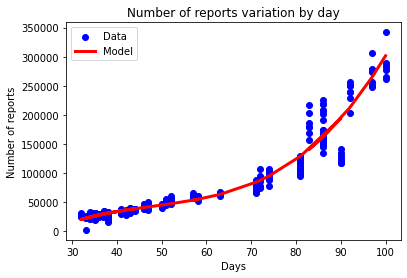

In [72]:
# Split the data into training and test sets
X_train, X_test, Y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create a polynomial feature transformer
poly_transformer = PolynomialFeatures(degree=3, include_bias=False)

# Transform the input features to include polynomial features
X_train_poly = poly_transformer.fit_transform(X_train.reshape(-1,1))

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data

model.fit(X_train_poly, Y_train)

# Predict the output for the training set
y_predicted = model.predict(X_train_poly)
#print(y_predicted)


# Get the coefficients
coeff = model.coef_
print(model.intercept_)
print('Coefficients:', coeff)

# Plot the data and the model
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, model.predict(poly_transformer.fit_transform(x.reshape(-1,1))), color='red', lw = 3, label='Model')
plt.xlabel('Days')
plt.ylabel('Number of reports')
plt.title('Number of reports variation by day')
plt.legend()
print(model.intercept_ + coeff[0]*300 + coeff[1]*(300**2) + coeff[2]*(300**3))

2162.5459380652414 -0.048652749049509315
13762701545.674194


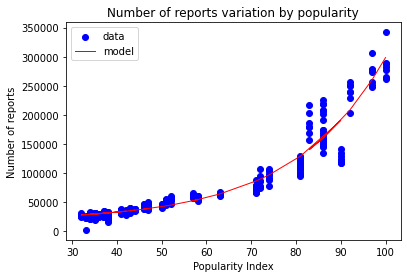

mse:  306228441.1489841
mape:  0.16765441487781613
R-squared value: 0.934749961041124


In [91]:
from scipy.optimize import curve_fit

# Define exponential decay function
def exp_decay(x, A, k):
    return A * np.exp(k * x)


# Convert the x and y columns to numeric types
x = pd.to_numeric(x, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Extract the x and y data from the dataframe
xdata = x
ydata = y

initial_guess = [max(ydata), 0.01]

# Fit the model to the data using initial guess
popt, pcov = curve_fit(exp_decay, xdata, ydata, p0=initial_guess)

# Extract the optimal parameter values
A, k = popt
y_predicted = exp_decay(xdata, A, k)


print(A, k)
print(exp_decay(35, A, k))

# Plot the exponential decay curve and the data
plt.scatter(xdata, ydata, color='blue', label='data')
plt.plot(xdata, exp_decay(xdata, A, k), 'r-', label='model', lw = 1)
plt.xlabel('Popularity Index')
plt.ylabel('Number of reports')
plt.title('Number of reports variation by popularity')
plt.legend()
plt.show()

r_squared = r2_score(ydata, y_predicted)
print("mse: ", mean_squared_error(ydata, y_predicted))
print("mape: ",mean_absolute_percentage_error(ydata,y_predicted))
print("R-squared value:", r_squared)

